# Data Mining

## Lab 4: k-Nearest Neighbours & k-Means

In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(1337)

## k-Nearest Neighbours

### Voronoi Tessellation

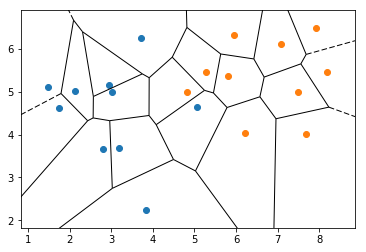

In [2]:
x1 = 3.5 + np.random.randn(10)
x2 = 6.5 + np.random.randn(10)
y1 = 5 + np.random.randn(10)
y2 = 5 + np.random.randn(10)
x = np.append(x1, x2)
y = np.append(y1, y2)

vor = Voronoi(np.array([x, y]).T)
voronoi_plot_2d(vor, show_points=False, show_vertices=False)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.grid(False)
plt.show()

Kita mencoba mengenalkan data baru di titik (6, 5), tetangga terdekatnya adalah titik dalam region yang sama. Dengan kata lain, Voronoi tessellation ini membentuk batas keputusan (_decision boundary_) dari algoritma Nearest Neighbour.

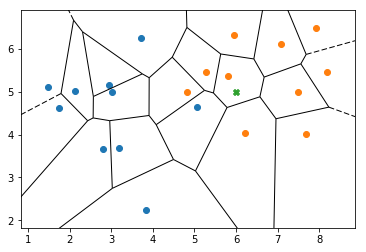

In [3]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter([6], [5], marker='X')
plt.grid(False)
plt.show()

### 7-NN untuk MNIST

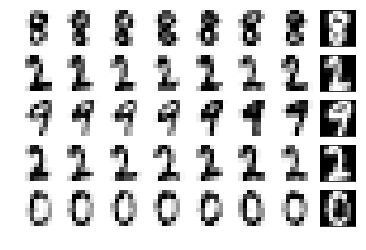

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

mnist = load_digits()

img_rows, img_cols = 8, 8

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=1945)
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

k = 7
n_samples = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
X_test = X_test[np.random.choice(len(X_test), n_samples, replace=False)]
knn = clf.kneighbors(X_test)

fig, ax = plt.subplots(n_samples, k+1)
x = X_train[knn[1]].reshape(n_samples, k, img_rows, img_cols)
for i in range(n_samples):
    for j in range(k):
        ax[i][j].imshow(x[i,j,:,:], cmap='Greys')
        ax[i][j].axis('off')
    ax[i][k].imshow(X_test[i].reshape(img_rows, img_cols), cmap='gray')
    ax[i][k].tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
    ax[i][k].grid('off')
plt.show()

Digit di paling kanan adalah kelasnya, sedangkan tujuh sampel di kirinya adalah 7-NN.

### Regresi dengan k-NN

k-NN juga dapat digunakan untuk regresi. Namun, regresi ini biasanya hanya bekerja baik untuk kasus interpolasi, bukan ekstrapolasi. Perhatikan grafik di bawah ini. Nilai $y$ untuk data $x_i$ dapat diestimasi dengan
$$
\hat{y} = \frac{1}{k} \sum_{j=1}^{k} y_{ij}
$$

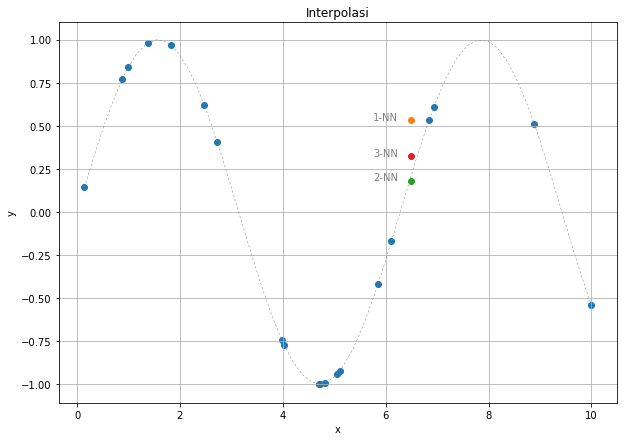

In [5]:
x = 10 * np.random.random(20)
xx = np.linspace(x.min(), x.max())
y = np.sin(x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y)
ax.plot(xx, np.sin(xx), c='gray', linestyle=':', linewidth=0.5)

style = dict(size=10, color='gray')

xn = 6.5
distance = np.abs(x - xn) # menghitung jarak dengan semua instances (absolut)
neighbours = np.array([distance, y]).T
# print(neighbours.shape)
for k in range(1, 4):
#     print(neighbours[neighbours[:, 0].argsort()][:k]) # k-NN
    yn = neighbours[neighbours[:, 0].argsort()][:k][:,1].mean() # mean value
    ax.scatter([xn], [yn])
    ax.text(xn - .75, yn, '%d-NN' % k, **style)
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Interpolasi')
plt.show()

Perhatikan bahwa pada saat kita melakukan ekstrapolasi seperti kode di bawah ini, estimasi $y$ hingga 3-NN bernilai $> 0.1$. Padahal, kita tahu bahwa fungsi yang menghasilkan data tersebut adalah fungsi $\sin()$ yang artinya nilainya akan lebih rendah daripada itu.

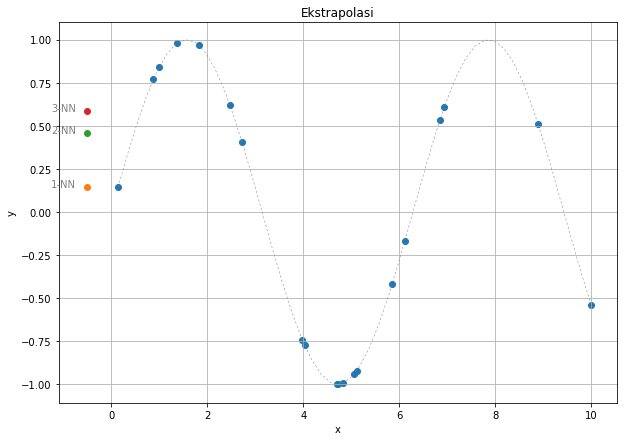

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y)
ax.plot(xx, np.sin(xx), c='gray', linestyle=':', linewidth=0.5)

style = dict(size=10, color='gray')

xn = -0.5
distance = np.abs(x - xn) # menghitung jarak dengan semua instances (absolut)
neighbours = np.array([distance, y]).T
# print(neighbours.shape)
for k in range(1, 4):
#     print(neighbours[neighbours[:, 0].argsort()][:k]) # k-NN
    yn = neighbours[neighbours[:, 0].argsort()][:k][:,1].mean() # mean value
    ax.scatter([xn], [yn])
    ax.text(xn - .75, yn, '%d-NN' % k, **style)
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Ekstrapolasi')
plt.show()

### Parzen Windows

Ada kemiripan antara k-NN dan Parzen Windows, yaitu sama-sama mencari tetangga terdekat. Namun, saat k-NN mencari $k$ tetangga terdekat sehingga batas keputusannya berbeda-beda besarnya, Parzen Windows membuat batas keputusannya dalam radius yang nilainya tetap. Jika ditilik lebih dalam, kita bisa melihat Parzen Windows punya prinsip kerja yang mirip dengan algoritma Support Vector Machines (SVM).

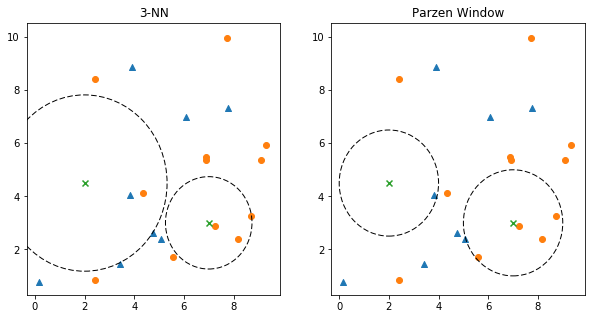

In [7]:
X_train = 10 * np.random.random(size=40).reshape(20,2)
y_train = np.random.randint(2, size=20)
X_test = np.array([2.,4.5,7.,3.]).reshape(2,2)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in range(2):
    ax[i].scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], marker='^')
    ax[i].scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1])
    ax[i].scatter(X_test[:,0], X_test[:,1], marker='x')

k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

knn = clf.kneighbors(X_test)
for i, test_point in enumerate(X_test):
    c = plt.Circle(test_point, knn[0][i,k-1], fill=False, linestyle='--')
    ax[0].add_artist(c)
    c = plt.Circle(test_point, 2, fill=False, linestyle='--')
    ax[1].add_artist(c)
ax[0].set_title('3-NN')
ax[1].set_title('Parzen Window')
plt.show()

### K-D Trees

Algoritma k-NN bisa berjalan sangat lambat karena perhitungan jarak harus dilakukan untuk setiap pasang data. Kompleksitasnya mencapai $O(nd)$ dengan $d$ adalah dimensi data (jumlah atribut) dan $n$ adalah jumlah data. Oleh karena itu, digunakanlah beberapa cara untuk mempercepat algoritma k-NN. Salah satu metode tersebut adalah dengan K-D Trees.

K-D Trees dibentuk dengan memilih dimensi secara acak, kemudian mencari median pada dimensi tersebut, lalu membagi datanya menjadi dua region. Proses ini diulangi terus untuk setiap region yang dihasilkan pada berbagai dimensi. Pencarian k-Nearest Neighbours nantinya hanya dilakukan dengan data yang berada pada region yang sama saja.

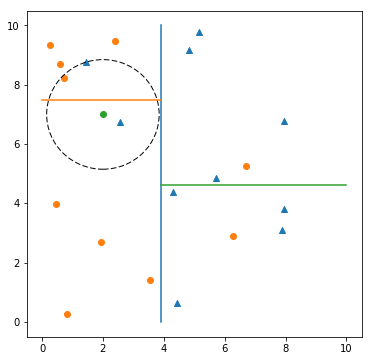

In [8]:
X_train = 10 * np.random.random(size=40).reshape(20,2)
y_train = np.random.randint(2, size=20)

med_x1 = np.median(X_train[:,0])
med_x20 = np.median(X_train[X_train[:,0] < med_x1,1])
med_x21 = np.median(X_train[X_train[:,0] >= med_x1,1])

fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(X_train[np.where(y_train == 0),0], X_train[np.where(y_train == 0),1], marker='^')
plt.scatter(X_train[np.where(y_train == 1),0], X_train[np.where(y_train == 1),1])
plt.plot([med_x1, med_x1], [0, 10])
plt.plot([0, med_x1], [med_x20, med_x20])
plt.plot([med_x1, 10], [med_x21, med_x21])

k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

X_test = np.array([[2.,7.]])
y_pred = clf.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1])

knn = clf.kneighbors(X_test)
c = plt.Circle(X_test[0], knn[0][0,k-1], fill=False, linestyle='--')
ax.add_artist(c)
plt.show()

Perhatikan bahwa tiga tetangga terdekat dari data baru (titik hijau) _sebenarnya_ berada dalam region yang berbeda. Masalah seperti ini yang membuat K-D Trees mungkin tidak memberikan solusi yang optimal.

## K-Means

Berbeda dengan k-Nearest Neighbours, k-Means merupakan algoritma untuk _unsupervised learning_, dalam hal ini adalah untuk tugas _clustering_. Dalam _clustering_, kita berusaha melihat subpopulasi dalam data dengan melihat kesamaan dari elemen di tiap subpopulasi tersebut.

Idenya adalah dengan menggunakan **centroids** atau titik-titik pusat yang mendefinisikan klaster-klaster yang ada. Tiap _centroid_ merupakan representasi dari nilai rata-rata dari objek yang masuk ke dalam klaster tersebut.

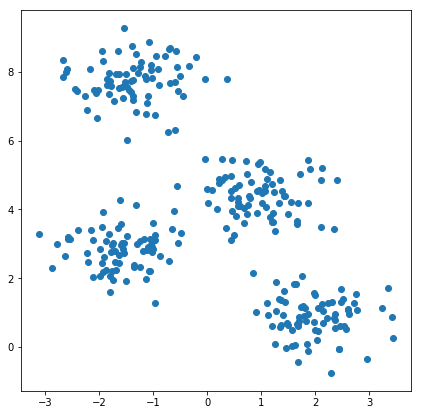

In [9]:
# Kode dari http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X[:,0], X[:,1])
plt.show()

Dalam gambar di bawah, setiap warna mewakili satu klaster. Tanda silang di gambar tersebut menunjukkan letak _centroids_-nya.

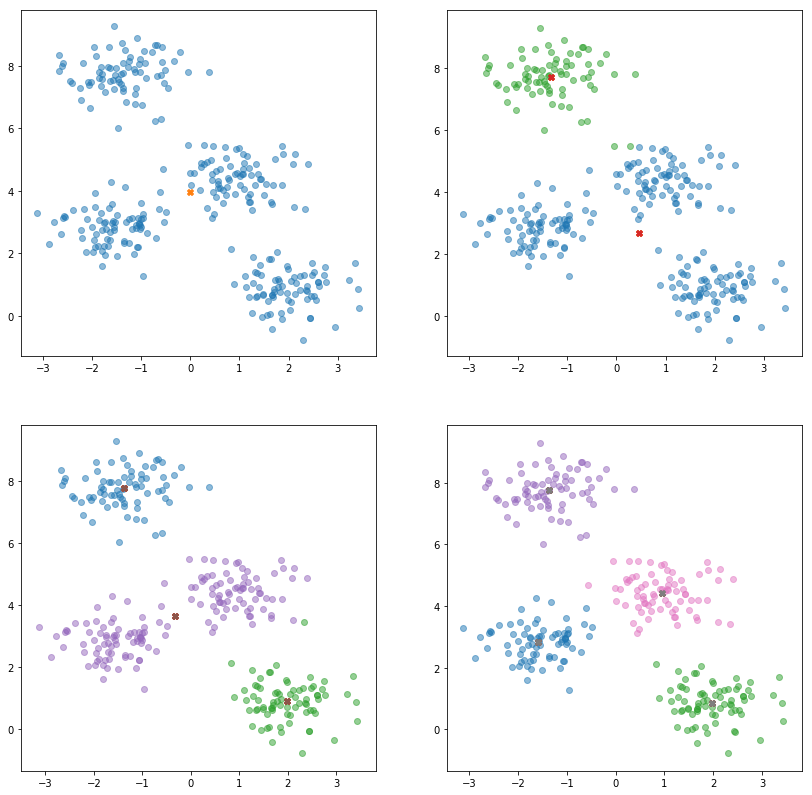

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14,14))

for n in range(4):
    kmeans = KMeans(n_clusters=n+1)
    kmeans.fit(X)

    for label in np.unique(kmeans.labels_):
        ax[n / 2][n % 2].scatter(X[np.where(kmeans.labels_ == label),0], X[np.where(kmeans.labels_ == label),1], alpha=.5)
        centers = kmeans.cluster_centers_
        ax[n / 2][n % 2].scatter(centers[:,0], centers[:,1], marker='X')
plt.show()

Pertanyaannya adalah bagaimana cara menentukan nilai $k$?

Ada beberapa cara:

1. Gunakan label kelas, e.g. 10 untuk MNIST
2. Gunakan V atau _inertia_ atau jarak agregat intraklaster (total jarak antara tiap data dalam suatu klaster dengan _centroid_-nya) $$V = \sum_{j} \sum_{x_i \rightarrow c_j} D(c_j, x_i)^2$$ lalu gunakan _elbow method_ (saat turunan curam berubah menjadi landai paling ekstrem)

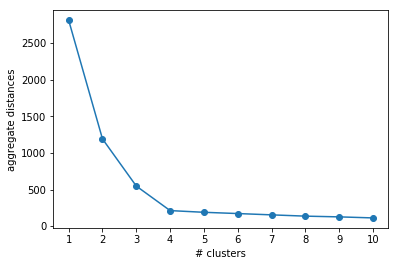

In [11]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

v = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    v.append(kmeans.inertia_)

plt.plot(range(1,11), v, 'o-')
plt.xticks(range(1,11), range(1,11))
plt.xlabel('# clusters')
plt.ylabel('aggregate distances')
plt.show()